In [1]:
import bempp.api
import scipy.sparse.linalg as spla
bempp.api.set_ipython_notebook_viewer()
from bempp.api.linalg.iterative_solvers import gmres
import numpy as np
import eigenvalue
import math

def fun(x, n, domain_index, result):
    result[0] = 1j * k * np.exp(1j * k * x[0]) * (n[0]-1)
    
x1, y1, z1 = [1, 0, 0]
x2, y2, z2 = [-.5, -np.sqrt(3)/2, 0]
x3, y3, z3 = [-.5, np.sqrt(3)/2, 0 ]
x4, y4, z4 = [0, 0, np.sqrt(6)/2]

xx = []
yy = []
zz = []

for i in range (0,100):
    if(i%2):
        xx.append()
    
vertices = np.array([[x1, x2, x3, x4],
                     [y1, y2, y3, y4],
                     [z1, z2, z3 ,z4]])*-1

vertices2 = np.array([[-.5, .5, .5 , -.5],
                      [-.5, -.5, .5, .5],
                      [0, 0, 0, 0]])

evaluation_points = np.array([[0,0,0,1],
                              [1,1,2,2],
                              [2,3,3,3]])
                      
evaluation_points2 = np.array([[0, 0],
                               [1, 2],
                               [2, 3]]) 

    
#grid = bempp.api.shapes.rectangle_with_hole(a=3, b=3, hole_radius=0.2, h=0.05)
#grid = bempp.api.grid_from_element_data(vertices2, evaluation_points2)
grid = bempp.api.shapes.regular_sphere(4)
#grid = bempp.api.shapes.cube()
#grid = bempp.api.grid_from_element_data(vertices, evaluation_points)
#grid_1 = bempp.api.shapes.rectangle_with_hole(a=1, b=1, hole_radius=0.2, h=0.05)
k = 10

grid.plot()

space=  bempp.api.function_space(grid,"DP",0)
piecewise_const_space = space

identity = bempp.api.operators.boundary.sparse.identity(
    piecewise_const_space, piecewise_const_space, piecewise_const_space)
adlp = bempp.api.operators.boundary.helmholtz.adjoint_double_layer(
    piecewise_const_space, piecewise_const_space, piecewise_const_space, k)
slp = bempp.api.operators.boundary.helmholtz.single_layer(
    piecewise_const_space, piecewise_const_space, piecewise_const_space, k)

helmholtz = bempp.api.operators.boundary.helmholtz.adjoint_double_layer(space,space,space,k)

lhs = 0.5*identity+adlp-1j*k*slp
#lhs=helmholtz

grid_fun = bempp.api.GridFunction(helmholtz.domain, fun=fun)
#grid_fun.plot()

phi, info = gmres(lhs, grid_fun)

#print("The linear system was solved in {0} iterations".format(it_count))

#phi.plot()
vector=phi.projections(helmholtz.dual_to_range)
print(vector.shape[0])


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

2048


In [15]:
#list = np.linalg.eigvals(bempp.api.as_matrix(lhs.weak_form()))
#print(min(np.abs(list)))
#print(eigenvalue.smallest_eigenvalue_inverse(lhs))
#print(eigenvalue.smallest_eigenvalue(lhs))

Nx = 300
Ny = 300
xmin, xmax, ymin, ymax = [-3, 3, -3, 3]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))
print(points)

[[-3.         -3.         -3.         ...,  3.          3.          3.        ]
 [-3.         -2.97993311 -2.95986622 ...,  2.95986622  2.97993311  3.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [16]:
u_evaluated = np.zeros(points.shape[1], dtype=np.complex128)
u_evaluated[:] = np.nan
print(u_evaluated)

x, y, z = points
coefficients1 = np.polyfit([x1,x2], [y1,y2], 1)
coefficients2 = np.polyfit([x1,x3], [y1,y3], 1)
idx = (y > x*coefficients1[0]-coefficients1[1]) | (x>0.5) | (y < x*coefficients2[0]-coefficients2[1])
#idx = (x<-0.5) | (x > .5) | (y < -.5) | (y > .5)
idx = np.sqrt(x**2 + y**2) > 1.0
#idx= (x<0) | (x>1) |(y>1) | (y<0)
#idx = ( (x!=0) | (y**2 > 1))
#idx = x < 100
print(idx)

from bempp.api.operators.potential import helmholtz as helmholtz_potential
slp_pot = helmholtz_potential.single_layer(
    space, points[:, idx], k)
res = np.real(np.exp(1j*k * points[0, idx]) - slp_pot.evaluate(phi))
print(slp_pot)
#print(eigenvalue.smallest_eigenvalue(slp_pot))
#res = np.real(slp_pot.evaluate(phi))
u_evaluated[idx] = res.flat
print(u_evaluated)

[ nan+0.j  nan+0.j  nan+0.j ...,  nan+0.j  nan+0.j  nan+0.j]
[ True  True  True ...,  True  True  True]
[ 0.07206210+0.j  0.08859260+0.j  0.10683032+0.j ...,  0.18471747+0.j
  0.16704415+0.j  0.14936026+0.j]


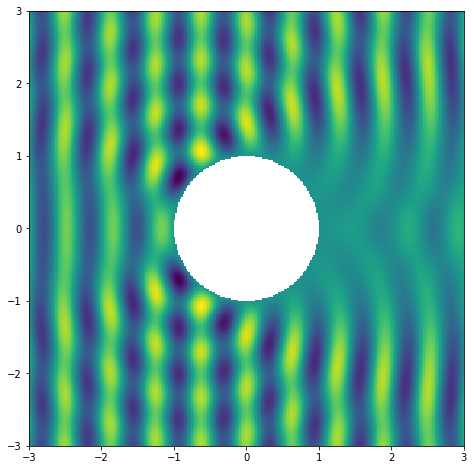

In [17]:
%matplotlib inline

u_evaluated = u_evaluated.reshape((Nx, Ny))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 8))
plt.imshow(np.real(u_evaluated.T), extent=[-3, 3, -3, 3])
#plt.xlabel('x')
#plt.ylabel('y')
#plt.colorbar()
#plt.title("Scattering from the unit sphere, solution in plane z=0")